# Matplotlib HowTo Part 2

### Using the normal distribution as an example.

In part 1 of this post we created a plot of the normal distribution and used some of the methods in the Matplot lib library.  We will continue to extend our diagram and as a result we will explore more features of Matplotlib.  First we will import the libraries that we will be using.

In [45]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import numpy as np
from scipy.stats import norm

%matplotlib inline

And we will recreate our x-axis array of points to use for plotting.

In [115]:
# Create an array of points to use as the x-coordinates for plotting the normal distribution
x_min = norm.ppf(0.00005) # we will plot 99.99 % of the normal curve.
x_max = norm.ppf(0.99995)
x = np.linspace(x_min, x_max, 201)

And the rest of the code that we arrived at from part 1.

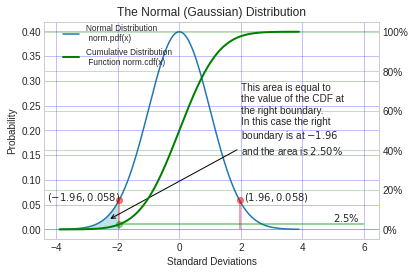

In [116]:
plt.style.use('seaborn-whitegrid')

# create a figure and an axes

fig, ax = plt.subplots()
# Create an Axes object that shares an x axis with the ax Axes that we just created above.
ax2 = ax.twinx()
# format that axis as a percentage.
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
# get a handle to the second curve we want to plot, the CDF.
ax2.plot(x, norm.cdf(x), label='Cumulative Distribution\n Function norm.cdf(x)', lw=2, color='green')

# plot our normal function.
l1 = ax.plot(x, norm.pdf(x), label='Normal Distribution\n norm.pdf(x)')[0]
# add our points of interest
ax.plot(-1.96, norm.pdf(1.96), color='red', marker='o', alpha=0.5)
ax.plot(1.96, norm.pdf(1.96), color='red', marker='o', alpha=0.5)
ax.vlines(x=[-1.96, 1.96], ymin=[0, 0], ymax=[norm.pdf(-1.96), norm.pdf(1.96)], color='red', alpha=0.5)

# add axis labels, title and legend
ax.set_xlabel('Standard Deviations')
ax.set_ylabel('Probability')
ax.set_title('The Normal (Gaussian) Distribution')

# customize our legend
fig.legend(
    fontsize='small',
    loc='upper left',
    framealpha=0.5,
    bbox_to_anchor=(0.15, 0.9) # note that here the coordinates are relative the the whole figure
)

# add some text.  By default the xy are in the axes coordinates
# but that can be changed with transformations
ax.text(-4.3, norm.pdf(-1.96), '$(-1.96, {0:.2})$'.format(norm.pdf(-1.96)))
ax.text(2.1, norm.pdf(1.96), '$(1.96, {0:.2})$'.format(norm.pdf(1.96)))

# add fill below the normal curve
# create an array of x-values to plot against
x2=np.linspace(x_min, norm.ppf(0.025))
ax.fill_between(x2, norm.pdf(x2), alpha=0.75, facecolor='lightblue')

# add annotation.  By default the xy are in the axes coordinates
# but that can be changed with transformations
text_string ='This area is equal to\nthe value of the CDF at\n'
text_string += 'the right boundary.\nIn this case the right\nboundary is at $-1.96$\n'
text_string += 'and the area is $2.50\%$'
ax.annotate(
    text_string,
    xy=(-2.3, norm.pdf(-1.96)/3),
    xytext=(2,0.15),
    arrowprops=dict(arrowstyle='->'))

# add a horizontal line from the CDF to the right axis and a point at the intersection
ax2.hlines(y=norm.cdf(-1.96), xmin=-1.96, xmax=6, color='green', alpha=0.5)
ax2.plot(-1.96, norm.cdf(-1.96), marker='o', color='green', alpha=0.4)

# add text to highlight the value of the CDF at -0.96
ax2.text(5,0.04, '$2.5\%$'.format(norm.cdf(-1.96)))

ax.grid(visible=True, color='blue', alpha=.3)
ax2.grid(visible=True, color='green', alpha=0.3)
plt.show()

I would like to add an additional x-axis scale, but this time call it a Z-Score axis.  Recall that the Z-score is the number of standard deviations away from the mean that a given value takes ( with negative values representing less than the mean value, and positive values representing greater than the mean value).  So if we have a normal distribution with a mean of 2 and a standard deviation of 3, then a value of 2 has a Z-Score of 0, and a value of 5 has a Z-score of 1.  I don't know about you but when I read that it makes sense but I don't think it gives a good picture of what is going on, so let's put it on a picture to see if that helps.

Adding an additional scale to a figure is not an uncommon thing to want to do so `Matplotlib` has an easy way to do this.

    ax3 = ax.secondary_xaxis(location, functions='none', **kwargs)

Location can be the descriptors `'top'`, `'bottom'`, `'left'`, or `'right'`, or it can also be a value along the (shared) y axis.  The `functions` named parameter takes a tuple of functions to use to convert between the two scales.  The first function of the tuple is how you convert from the primary scale to the secondary scale, and the second function is the inverse.  So in our case, if we were to add the mean $\mu$ `=mu` and standard deviation $\sigma$ `=sigma` parameters to our code so that we can plot arbitrary normal distributions then the functions would be:

    # paramaters for the normal distribution
    mu = 2
    sigma = 3
    
    # how to translate between different scales on the x-axis'
    def toZscore(x):
        return ((x - mu) / sigma)
    
    def fromZscore(x):
        return ((sigma * x) + mu)

Since now we are plotting an arbitrary normal distribution, and not just the standard normal distribution, we need to change some things about our original code.  Most of the points were placed with the assumption that the mean was 0 and the standard deviation was 1 (standard normal).  Moving forward we need the code to facilitate using parameters $\mu$ `=mu` and $\sigma$ `=sigma`.  One way to make this change is to get what is called a frozen copy of the normal distribution using a particular set of parameters.  In `scipy.stats` we do this by assigning the result of a call to the normal distribution to a variable:
    
    # get a reference to a frozen version of the normal function with the loc and scale parameters set.
    n = scipy.stats.norm(loc=mu, scale=sigma)

Now we can replace our calls to the normal fucntion, with calls to this new function `n`, which is just the normal function but with different paramaters, `mu` and `sigma`. This next cell is mostly just a refactoring of what we had previously to use the paramaters $\mu$ and $\sigma$.

Now that we have modified our original code to use our new version of the normal distribution, this is the code that addresses the additional axis.

    # add an additional x-axis
    # shift the original axes object up
    fig.subplots_adjust(bottom=0.2)
    ax3 = ax.secondary_xaxis(-0.1, functions=(toZscore, fromZscore))
    ax3.set_xlabel('Standard Deviations')
    ax3.xaxis.set_label_coords(-.15,-0.1)

    # move our initial x-axis label off the the left.
    ax.xaxis.set_label_coords(-0.05, -0.025)

Also, the figure itself is a bit small, now that we have all this extra information going into it.  So we need to make it larger.  To do that we use the `.set_figheight()` and the `.set_figwidth()` methods. 

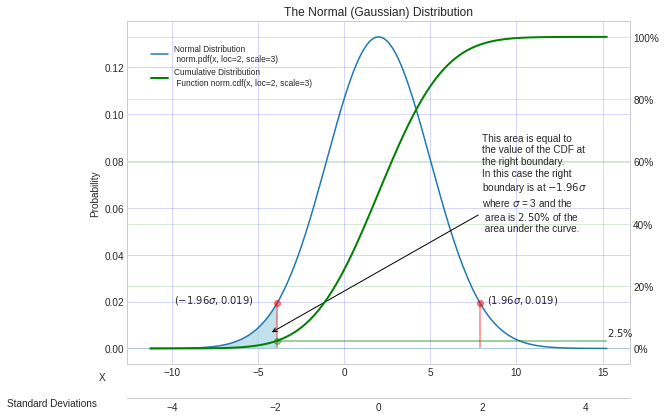

In [122]:
plt.style.use('seaborn-whitegrid')

# paramaters for the normal distribution
mu = 2
sigma = 3

# how to translate between different scales on the x-axis'
def toZscore(x):
    return ((x - mu) / sigma)

def fromZscore(x):
    return ((sigma * x) + mu)

# get a reference to a frozen version of the normal function with the loc and scale paramaters set.
n = norm(loc=mu, scale=sigma)

# Rebuild the array of points to use as the x-coordinates for plotting the normal distribution
x_min = n.ppf(0.000005) # we will plot 99.999 % of the normal curve.
x_max = n.ppf(0.999995)
x = np.linspace(x_min, x_max, 201)

# create a figure and an axes
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(9)

# Create an Axes object that shares an x axis with the ax Axes that we just created above.
ax2 = ax.twinx()

# format that axis as a percentage.
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# the second curve we want to plot, the CDF.
ax2.plot(x,
         n.cdf(x),
         label='Cumulative Distribution\n Function norm.cdf(x, loc={}, scale={})'.format(mu, sigma),
         lw=2,
         color='green'
        )

# plot our normal function.
ax.plot(x,
        n.pdf(x),
        label='Normal Distribution\n norm.pdf(x, loc={}, scale={})'.format(mu, sigma)
       )

# add our points of interest
ax.plot(fromZscore(-1.96),
        n.pdf(fromZscore(-1.96)),
        color='red',
        marker='o',
        alpha=0.5
       )
ax.plot(fromZscore(1.96),
        n.pdf(fromZscore(1.96)),
        color='red',
        marker='o',
        alpha=0.5
       )
# add vertical lines
ax.vlines(x=[fromZscore(-1.96), fromZscore(1.96)],
          ymin=[0, 0],
          ymax=[n.pdf(fromZscore(-1.96)), n.pdf(fromZscore(1.96))],
          color='red',
          alpha=0.5
         )

# add axis labels, title and legend
ax.set_xlabel('X')
ax.set_ylabel('Probability')
ax.set_title('The Normal (Gaussian) Distribution')

# customize our legend
fig.legend(
    fontsize='small',
    loc='upper left',
    framealpha=0.5,
    bbox_to_anchor=(0.15, 0.85) # note that here the coordinates are relative the the whole figure
)

# add some text.  By default the xy are in the axes coordinates
# but that can be changed with transformations
ax.text(-3.3*sigma, 
        n.pdf(fromZscore(-1.96)),
        '$(-1.96\sigma, {0:.2})$'.format(n.pdf(fromZscore(-1.96)))
       )
ax.text(2.1 * sigma + mu,
        n.pdf(1.96*sigma + mu),
        '$(1.96\sigma, {0:.2})$'.format(n.pdf(fromZscore(1.96)))
       )

# add fill below the normal curve
# create an array of x-values to plot against
x2=np.linspace(x_min, n.ppf(0.025))
ax.fill_between(x2, n.pdf(x2), alpha=0.75, facecolor='lightblue')

# add annotation.  By default the xy are in the axes coordinates
# but that can be changed with transformations
text_string ='This area is equal to\nthe value of the CDF at\n'
text_string += 'the right boundary.\nIn this case the right\nboundary is at $-1.96\sigma$\n'
text_string += 'where $\sigma$ = {} and the\n area is $2.50\%$ of the\n area under the curve.'.format(sigma)
ax.annotate(
    text_string,
    xy=(-2.1*sigma + mu, n.pdf(fromZscore(-1.96))/3),
    xytext=(2*sigma + mu,0.05),
    arrowprops=dict(arrowstyle='->'))

# add a horizontal line from the CDF to the right axis and a point at the intersection
ax2.hlines(y=n.cdf(fromZscore(-1.96)),
           xmin=-1.96*sigma + mu,
           xmax=x_max,
           color='green',
           alpha=0.5
          )
# add our dot
ax2.plot(fromZscore(-1.96), n.cdf(fromZscore(-1.96)), marker='o', color='green', alpha=0.4)

# add text to highlight the value of the CDF at -0.96
ax2.text(x_max,0.04, '$2.5\%$'.format(n.cdf(fromZscore(-1.96))))

# adjust the transparency and color of the grids for each axex object
ax.grid(visible=True, color='blue', alpha=.2)
ax2.grid(visible=True, color='green', alpha=0.2)

# add an additional x-axis
# shift the original axes object up
fig.subplots_adjust(bottom=0.2)
ax3 = ax.secondary_xaxis(-0.1, functions=(toZscore, fromZscore))
ax3.set_xlabel('Standard Deviations')
ax3.xaxis.set_label_coords(-.15,-0.1)

# move our initial x-axis label off the the left.
ax.xaxis.set_label_coords(-0.05, -0.025)

plt.show()
#plt.savefig('figure_1.png', bbox_inches='tight')

In order to drive home the point about how the mean and standard deviation are related to our curve lets add a vertical line at the mean.

    ax.vlines(x=mean, ymin=0, ymax=n.pdf(mean), linestyle='dotted')
    
And vertical lines at the $-\sigma$ and $\sigma$ points.

    ax.vlines(x=[-sigma, sigma], ymin=0, ymax=n.pdf(sigma), linestyle='dotted'

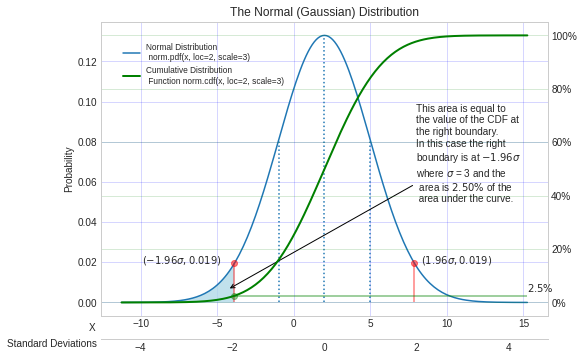

In [123]:
plt.style.use('seaborn-whitegrid')

# paramaters for the normal distribution
mu = 2
sigma = 3

# how to translate between different scales on the x-axis'
def toZscore(x):
    return ((x - mu) / sigma)

def fromZscore(x):
    return ((sigma * x) + mu)

# get a reference to a frozen version of the normal function with the loc and scale paramaters set.
n = norm(loc=mu, scale=sigma)

# Rebuild the array of points to use as the x-coordinates for plotting the normal distribution
x_min = n.ppf(0.000005) # we will plot 99.999 % of the normal curve.
x_max = n.ppf(0.999995)
x = np.linspace(x_min, x_max, 201)

# create a figure and an axes
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(8)

# Create an Axes object that shares an x axis with the ax Axes that we just created above.
ax2 = ax.twinx()

# format that axis as a percentage.
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# the second curve we want to plot, the CDF.
ax2.plot(x,
         n.cdf(x),
         label='Cumulative Distribution\n Function norm.cdf(x, loc={}, scale={})'.format(mu, sigma),
         lw=2,
         color='green'
        )

# plot our normal function.
ax.plot(x,
        n.pdf(x),
        label='Normal Distribution\n norm.pdf(x, loc={}, scale={})'.format(mu, sigma)
       )

# add our points of interest
ax.plot(fromZscore(-1.96),
        n.pdf(fromZscore(-1.96)),
        color='red',
        marker='o',
        alpha=0.5
       )
ax.plot(fromZscore(1.96),
        n.pdf(fromZscore(1.96)),
        color='red',
        marker='o',
        alpha=0.5
       )
# add vertical lines
ax.vlines(x=[fromZscore(-1.96), fromZscore(1.96)],
          ymin=[0, 0],
          ymax=[n.pdf(fromZscore(-1.96)), n.pdf(fromZscore(1.96))],
          color='red',
          alpha=0.5
         )

# add axis labels, title and legend
ax.set_xlabel('X')
ax.set_ylabel('Probability')
ax.set_title('The Normal (Gaussian) Distribution')

# customize our legend
fig.legend(
    fontsize='small',
    loc='upper left',
    framealpha=0.5,
    bbox_to_anchor=(0.15, 0.85) # note that here the coordinates are relative the the whole figure
)

# add some text.  By default the xy are in the axes coordinates
# but that can be changed with transformations
ax.text(-3.3*sigma, 
        n.pdf(fromZscore(-1.96)),
        '$(-1.96\sigma, {0:.2})$'.format(n.pdf(fromZscore(-1.96)))
       )
ax.text(2.1 * sigma + mu,
        n.pdf(1.96*sigma + mu),
        '$(1.96\sigma, {0:.2})$'.format(n.pdf(fromZscore(1.96)))
       )

# add fill below the normal curve
# create an array of x-values to plot against
x2=np.linspace(x_min, n.ppf(0.025))
ax.fill_between(x2, n.pdf(x2), alpha=0.75, facecolor='lightblue')

# add annotation.  By default the xy are in the axes coordinates
# but that can be changed with transformations
text_string ='This area is equal to\nthe value of the CDF at\n'
text_string += 'the right boundary.\nIn this case the right\nboundary is at $-1.96\sigma$\n'
text_string += 'where $\sigma$ = {} and the\n area is $2.50\%$ of the\n area under the curve.'.format(sigma)
ax.annotate(
    text_string,
    xy=(-2.1*sigma + mu, n.pdf(fromZscore(-1.96))/3),
    xytext=(2*sigma + mu,0.05),
    arrowprops=dict(arrowstyle='->'))

# add a horizontal line from the CDF to the right axis and a point at the intersection
ax2.hlines(y=n.cdf(fromZscore(-1.96)),
           xmin=-1.96*sigma + mu,
           xmax=x_max,
           color='green',
           alpha=0.5
          )
# add our dot
ax2.plot(fromZscore(-1.96), n.cdf(fromZscore(-1.96)), marker='o', color='green', alpha=0.4)

# add text to highlight the value of the CDF at -0.96
ax2.text(x_max,0.04, '$2.5\%$'.format(n.cdf(fromZscore(-1.96))))

# adjust the transparency and color of the grids for each axex object
ax.grid(visible=True, color='blue', alpha=.2)
ax2.grid(visible=True, color='green', alpha=0.2)

# add an additional x-axis
# shift the original axes object up
fig.subplots_adjust(bottom=0.2)
ax3 = ax.secondary_xaxis(-0.08, functions=(toZscore, fromZscore))
ax3.set_xlabel('Standard Deviations')
ax3.xaxis.set_label_coords(-.11,-0.1)

# move our initial x-axis label off the the left.
ax.xaxis.set_label_coords(-0.02, -0.025)

# add a vertical dashed line at the mean, -sigma and sigma.
ax.vlines(x=mu, ymin=0, ymax=n.pdf(mu), linestyle='dotted')
ax.vlines(x=[mu-sigma, mu+sigma], ymin=0, ymax=n.pdf(mu+sigma), linestyle='dotted')

#ax.text(-sigma,n.pdf(sigma)/8, '$\sigma$ = scale' )
#plt.show()
plt.savefig('figure_2.png', bbox_inches='tight')

And this is ok, but if we could customize both of those x-axes we might be better able to see the correlation between them.  It would be nice if we had little lines at the labeled points on the secondary axis. The little lines are called tics.  There are two types of ticks: major and minor. To adjust what tics are generated we use

    matplotlib.pyplot.set_xticks(ticks=None, labels=None, minor=False, **kwargs)

Where the `ticks=` named parameter takes an array-like of values where ticks should appear and the `labels=` named parameter is the names to use for those ticks.  If `None` is specified then the values in the array-like are used.  And to adjust the appearance of those tics we can use

    matplotlib.pyplot.tick_params(axis='both', **kwargs)

To get a list of all the parameters that can be adjusted we consult the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tick_params.html).  The parameters that we will use here are `which=` to determine if we are adjusting the `major` or `minor` tics, `length=` to determine the length of the tics in points,  and the `direction=` to control if the tick is pointing into the figure our out of the figure.

Here is the code that we are adding to adjust the ticks:

    ax3.set_xticks([x for x in range(-4,6)], minor=True)
    ax3.tick_params(length = 10, which='major', direction='in')
    ax3.tick_params(length= 10, which='minor', direction='inout')


And we might want to label $\mu$ and $\mu \pm \sigma$ on our figure.  This is the code that we are adding to do that.

    ax.text(mu+0.02, 
            n.pdf(mu)/12,
            '$\mu$ = {}'.format(mu)
           )
    ax.text(mu+sigma+0.02, 
            n.pdf(mu)/12,
            '$\mu + \sigma$'
           )
    ax.text(mu-sigma+0.02, 
            n.pdf(mu)/12,
            '$\mu - \sigma$'
           )


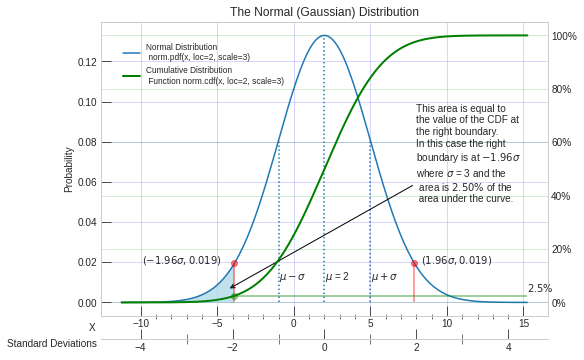

In [128]:
plt.style.use('seaborn-whitegrid')

# paramaters for the normal distribution
mu = 2
sigma = 3

# how to translate between different scales on the x-axis'
def toZscore(x):
    return ((x - mu) / sigma)

def fromZscore(x):
    return ((sigma * x) + mu)

# get a reference to a frozen version of the normal function with the loc and scale paramaters set.
n = norm(loc=mu, scale=sigma)

# Rebuild the array of points to use as the x-coordinates for plotting the normal distribution
x_min = n.ppf(0.000005) # we will plot 99.999 % of the normal curve.
x_max = n.ppf(0.999995)
x = np.linspace(x_min, x_max, 201)

# create a figure and an axes
fig, ax = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(8)

# Create an Axes object that shares an x axis with the ax Axes that we just created above.
ax2 = ax.twinx()

# format that axis as a percentage.
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# the second curve we want to plot, the CDF.
ax2.plot(x,
         n.cdf(x),
         label='Cumulative Distribution\n Function norm.cdf(x, loc={}, scale={})'.format(mu, sigma),
         lw=2,
         color='green'
        )

# plot our normal function.
ax.plot(x,
        n.pdf(x),
        label='Normal Distribution\n norm.pdf(x, loc={}, scale={})'.format(mu, sigma)
       )

# add our points of interest
ax.plot(fromZscore(-1.96),
        n.pdf(fromZscore(-1.96)),
        color='red',
        marker='o',
        alpha=0.5
       )
ax.plot(fromZscore(1.96),
        n.pdf(fromZscore(1.96)),
        color='red',
        marker='o',
        alpha=0.5
       )
# add vertical lines
ax.vlines(x=[fromZscore(-1.96), fromZscore(1.96)],
          ymin=[0, 0],
          ymax=[n.pdf(fromZscore(-1.96)), n.pdf(fromZscore(1.96))],
          color='red',
          alpha=0.5
         )

# add axis labels, title and legend
ax.set_xlabel('X')
ax.set_ylabel('Probability')
ax.set_title('The Normal (Gaussian) Distribution')

# customize our legend
fig.legend(
    fontsize='small',
    loc='upper left',
    framealpha=0.5,
    bbox_to_anchor=(0.15, 0.85) # note that here the coordinates are relative the the whole figure
)

# add some text.  By default the xy are in the axes coordinates
# but that can be changed with transformations
ax.text(-3.3*sigma, 
        n.pdf(fromZscore(-1.96)),
        '$(-1.96\sigma, {0:.2})$'.format(n.pdf(fromZscore(-1.96)))
       )
ax.text(2.1 * sigma + mu,
        n.pdf(1.96*sigma + mu),
        '$(1.96\sigma, {0:.2})$'.format(n.pdf(fromZscore(1.96)))
       )

# add fill below the normal curve
# create an array of x-values to plot against
x2=np.linspace(x_min, n.ppf(0.025))
ax.fill_between(x2, n.pdf(x2), alpha=0.75, facecolor='lightblue')

# add annotation.  By default the xy are in the axes coordinates
# but that can be changed with transformations
text_string ='This area is equal to\nthe value of the CDF at\n'
text_string += 'the right boundary.\nIn this case the right\nboundary is at $-1.96\sigma$\n'
text_string += 'where $\sigma$ = {} and the\n area is $2.50\%$ of the\n area under the curve.'.format(sigma)
ax.annotate(
    text_string,
    xy=(-2.1*sigma + mu, n.pdf(fromZscore(-1.96))/3),
    xytext=(2*sigma + mu,0.05),
    arrowprops=dict(arrowstyle='->'))

# add a horizontal line from the CDF to the right axis and a point at the intersection
ax2.hlines(y=n.cdf(fromZscore(-1.96)),
           xmin=-1.96*sigma + mu,
           xmax=x_max,
           color='green',
           alpha=0.5
          )
# add our dot
ax2.plot(fromZscore(-1.96), n.cdf(fromZscore(-1.96)), marker='o', color='green', alpha=0.4)

# add text to highlight the value of the CDF at -0.96
ax2.text(x_max,0.04, '$2.5\%$'.format(n.cdf(fromZscore(-1.96))))

# adjust the transparency and color of the grids for each axex object
ax.grid(visible=True, color='blue', alpha=.2)
ax2.grid(visible=True, color='green', alpha=0.2)

# add a vertical dashed line at the mean, -sigma and sigma.
ax.vlines(x=mu, ymin=0, ymax=n.pdf(mu), linestyle='dotted')
ax.vlines(x=[mu-sigma, mu+sigma], ymin=0, ymax=n.pdf(mu+sigma), linestyle='dotted')
ax.text(mu+0.02, 
        n.pdf(mu)/12,
        '$\mu$ = {}'.format(mu)
       )
ax.text(mu+sigma+0.02, 
        n.pdf(mu)/12,
        '$\mu + \sigma$'
       )
ax.text(mu-sigma+0.02, 
        n.pdf(mu)/12,
        '$\mu - \sigma$'
       )

# add an additional x-axis
# shift the original axes object up
fig.subplots_adjust(bottom=0.2)
ax3 = ax.secondary_xaxis(-0.08, functions=(toZscore, fromZscore))
ax3.set_xlabel('Standard Deviations')
ax3.xaxis.set_label_coords(-.11,-0.1)
ax3.set_xticks([x for x in range(-4,6)], minor=True)
ax3.tick_params(length = 10, which='major', direction='in')
ax3.tick_params(length= 10, which='minor', direction='inout')
# add tics to our primary x axis
ax.tick_params(length = 10, which='major', direction='in')
ax.tick_params(length= 5, which='minor', direction='inout')
ax.set_xticks([x for x in range(-10,16)], minor=True)

# move our initial x-axis label off the the left.
ax.xaxis.set_label_coords(-0.02, -0.025)


#plt.show()
plt.savefig('figure_3.png', bbox_inches='tight')